In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df= pd.read_csv('loan.csv')

## 1. Understanding the data

In [2]:
df.shape

(39717, 111)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
df.groupby('purpose')
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Data Cleaning

#### Drop all the columns having null values

In [6]:
df=df.dropna(axis=1,how='all')
df.shape

(39717, 57)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

#### Drop all the columns which are of no use to analyse the defaulters
or
##### Select the values which are useful for analysis

In [8]:
df1=df[['loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment','grade','sub_grade','emp_length','home_ownership','annual_inc','verification_status','loan_status','purpose','dti','open_acc','total_acc','revol_bal','revol_util']]

In [9]:
df1.shape

(39717, 19)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt          39717 non-null  int64  
 2   funded_amnt_inv      39717 non-null  float64
 3   term                 39717 non-null  object 
 4   int_rate             39717 non-null  object 
 5   installment          39717 non-null  float64
 6   grade                39717 non-null  object 
 7   sub_grade            39717 non-null  object 
 8   emp_length           38642 non-null  object 
 9   home_ownership       39717 non-null  object 
 10  annual_inc           39717 non-null  float64
 11  verification_status  39717 non-null  object 
 12  loan_status          39717 non-null  object 
 13  purpose              39717 non-null  object 
 14  dti                  39717 non-null  float64
 15  open_acc             39717 non-null 

In [11]:
df1.head(60)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,total_acc,revol_bal,revol_util
0,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.00,Verified,Fully Paid,credit_card,27.65,3,9,13648,83.70%
1,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.00,Source Verified,Charged Off,car,1.00,3,4,1687,9.40%
2,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.00,Not Verified,Fully Paid,small_business,8.72,2,10,2956,98.50%
3,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.00,Source Verified,Fully Paid,other,20.00,10,37,5598,21%
4,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.00,Source Verified,Current,other,17.94,15,38,27783,53.90%
5,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.00,Source Verified,Fully Paid,wedding,11.20,9,12,7963,28.30%
6,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,8 years,RENT,47004.00,Not Verified,Fully Paid,debt_consolidation,23.51,7,11,17726,85.60%
7,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,9 years,RENT,48000.00,Source Verified,Fully Paid,car,5.35,4,4,8221,87.50%
8,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,4 years,OWN,40000.00,Source Verified,Charged Off,small_business,5.55,11,13,5210,32.60%
9,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,< 1 year,RENT,15000.00,Verified,Charged Off,other,18.08,2,3,9279,36.50%


#### Fix the columns which have '%' and convert to float.

In [12]:
df1['int_rate']=df1['int_rate'].str.rstrip('%').astype(float)

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt          39717 non-null  int64  
 2   funded_amnt_inv      39717 non-null  float64
 3   term                 39717 non-null  object 
 4   int_rate             39717 non-null  float64
 5   installment          39717 non-null  float64
 6   grade                39717 non-null  object 
 7   sub_grade            39717 non-null  object 
 8   emp_length           38642 non-null  object 
 9   home_ownership       39717 non-null  object 
 10  annual_inc           39717 non-null  float64
 11  verification_status  39717 non-null  object 
 12  loan_status          39717 non-null  object 
 13  purpose              39717 non-null  object 
 14  dti                  39717 non-null  float64
 15  open_acc             39717 non-null 

In [14]:
# Remove % for revol_util using rstrip function
df1['revol_util'] = df1['revol_util'].str.rstrip('%').astype(float)

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt          39717 non-null  int64  
 2   funded_amnt_inv      39717 non-null  float64
 3   term                 39717 non-null  object 
 4   int_rate             39717 non-null  float64
 5   installment          39717 non-null  float64
 6   grade                39717 non-null  object 
 7   sub_grade            39717 non-null  object 
 8   emp_length           38642 non-null  object 
 9   home_ownership       39717 non-null  object 
 10  annual_inc           39717 non-null  float64
 11  verification_status  39717 non-null  object 
 12  loan_status          39717 non-null  object 
 13  purpose              39717 non-null  object 
 14  dti                  39717 non-null  float64
 15  open_acc             39717 non-null 

#### Convert Term from object type to integer

In [16]:
df1['term']=df1['term'].str.rstrip('months').astype(int)

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt          39717 non-null  int64  
 2   funded_amnt_inv      39717 non-null  float64
 3   term                 39717 non-null  int64  
 4   int_rate             39717 non-null  float64
 5   installment          39717 non-null  float64
 6   grade                39717 non-null  object 
 7   sub_grade            39717 non-null  object 
 8   emp_length           38642 non-null  object 
 9   home_ownership       39717 non-null  object 
 10  annual_inc           39717 non-null  float64
 11  verification_status  39717 non-null  object 
 12  loan_status          39717 non-null  object 
 13  purpose              39717 non-null  object 
 14  dti                  39717 non-null  float64
 15  open_acc             39717 non-null 

#### Drop rows with na values in emp length column

In [18]:
df1.dropna(subset=['emp_length'], axis=0, inplace=True)

#### Drop rows with na values in revol util

In [19]:
df1.dropna(subset=['revol_util'], axis=0, inplace=True)

## Outlier analysis and treatment

<AxesSubplot:>

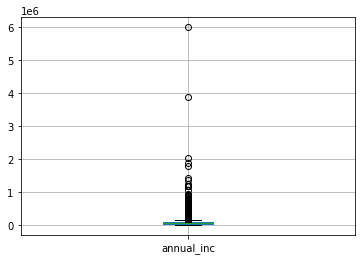

In [21]:
df1.boxplot(['annual_inc'])

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38595 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38595 non-null  int64  
 1   funded_amnt          38595 non-null  int64  
 2   funded_amnt_inv      38595 non-null  float64
 3   term                 38595 non-null  int64  
 4   int_rate             38595 non-null  float64
 5   installment          38595 non-null  float64
 6   grade                38595 non-null  object 
 7   sub_grade            38595 non-null  object 
 8   emp_length           38595 non-null  object 
 9   home_ownership       38595 non-null  object 
 10  annual_inc           38595 non-null  float64
 11  verification_status  38595 non-null  object 
 12  loan_status          38595 non-null  object 
 13  purpose              38595 non-null  object 
 14  dti                  38595 non-null  float64
 15  open_acc             38595 non-null 

In [22]:
df1['annual_inc'].describe()

count    3.859500e+04
mean     6.963713e+04
std      6.424780e+04
min      4.000000e+03
25%      4.150000e+04
50%      6.000000e+04
75%      8.320000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

#### Remove outliers for annual Income

In [23]:
df1=df1[df1['annual_inc']<df1['annual_inc'].quantile(0.99)]

In [24]:
df1['annual_inc'].describe()

count     38203.000000
mean      66147.979065
std       35194.182121
min        4000.000000
25%       41000.000000
50%       59800.000000
75%       82000.000000
max      234996.000000
Name: annual_inc, dtype: float64

<AxesSubplot:>

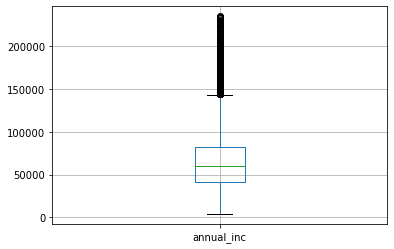

In [25]:
df1.boxplot(['annual_inc'])

#### check for outliers in open acc and total acc

<AxesSubplot:>

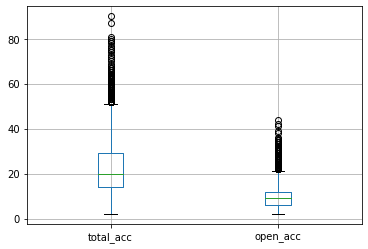

In [26]:
df1.boxplot(['total_acc','open_acc'])

In [27]:
df1['total_acc'].describe()

count    38203.000000
mean        22.055519
std         11.348879
min          2.000000
25%         14.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64

In [28]:
df1=df1[df1['total_acc']<df1['total_acc'].quantile(0.99)]

In [29]:
df1=df1[df1['open_acc']<df1['open_acc'].quantile(0.99)]

In [30]:
df1=df1[df1['loan_amnt']<df1['loan_amnt'].quantile(0.95)]

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34518 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            34518 non-null  int64  
 1   funded_amnt          34518 non-null  int64  
 2   funded_amnt_inv      34518 non-null  float64
 3   term                 34518 non-null  int64  
 4   int_rate             34518 non-null  float64
 5   installment          34518 non-null  float64
 6   grade                34518 non-null  object 
 7   sub_grade            34518 non-null  object 
 8   emp_length           34518 non-null  object 
 9   home_ownership       34518 non-null  object 
 10  annual_inc           34518 non-null  float64
 11  verification_status  34518 non-null  object 
 12  loan_status          34518 non-null  object 
 13  purpose              34518 non-null  object 
 14  dti                  34518 non-null  float64
 15  open_acc             34518 non-null 

### Categorical univariate analysis

<AxesSubplot:xlabel='loan_status'>

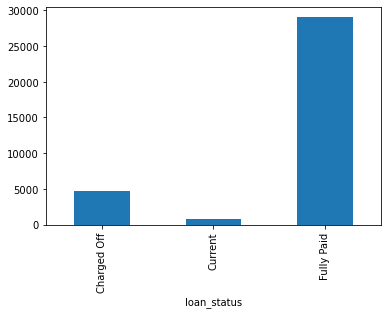

In [32]:
df1.groupby(['loan_status']).size().plot(kind="bar")

<AxesSubplot:xlabel='term', ylabel='count'>

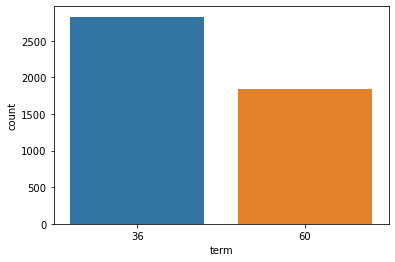

In [33]:
import seaborn as sns
sns.countplot(x='term',data=df1[df1['loan_status']=='Charged Off'])

#### Observation: From the above plot we can see that amount of loans charged off are more for 36 months than 60 months

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

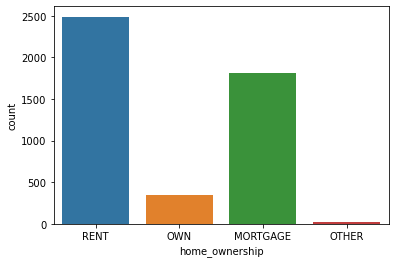

In [34]:
sns.countplot(x='home_ownership',data=df1[df1['loan_status']=='Charged Off'])

##### Observation: From this plot we can clearly depict that defaulters are more that rent a home.

<AxesSubplot:xlabel='purpose', ylabel='count'>

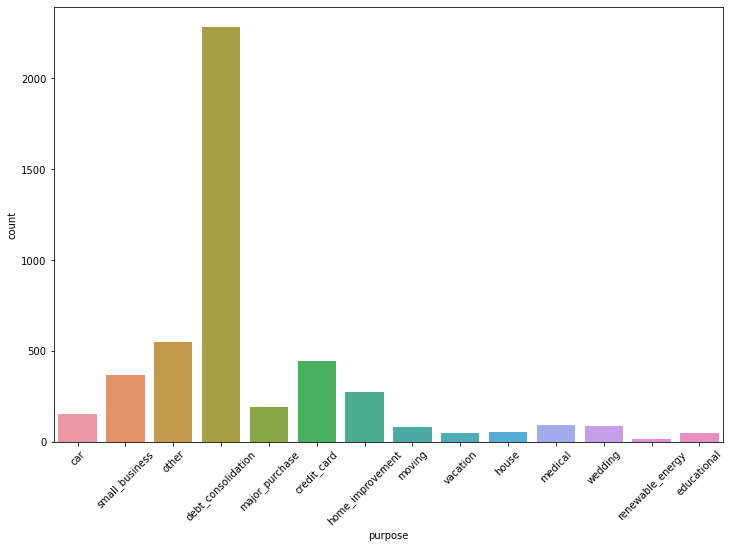

In [35]:
fig, ax = plt.subplots(figsize = (12,8))
plt.xticks(rotation=45)
sns.countplot(x='purpose',data=df1[df1['loan_status']=='Charged Off'])

#### Observation: Defaulters increase when the purpose is debt_consolidation

### Create bins and doing univariate analysis

In [36]:
#creating bins for loan amount to do ordered categorical univariate analysis
loan_bins=[0,5000,10000,15000,20000,25000]
df1['loan_amnt_range']= pd.cut(df1['loan_amnt'],loan_bins)

#creating bins for interest rate
int_bins=[0,5.00,10.00,15.00,20.00,25.00]
df1['int_rate_range']=pd.cut(df1['int_rate'],int_bins)

#creating bins for annual income
income_bins=[0,25000,50000,75000,100000,150000,200000]
df1['income_range']=pd.cut(df1['annual_inc'],income_bins)

#creating bins for dti range
bins=[-5,5.00,10.00,15.00,20.00,25.00,30.00]
df1['dti_range']= pd.cut(df1['dti'],bins)

<AxesSubplot:xlabel='loan_amnt_range', ylabel='count'>

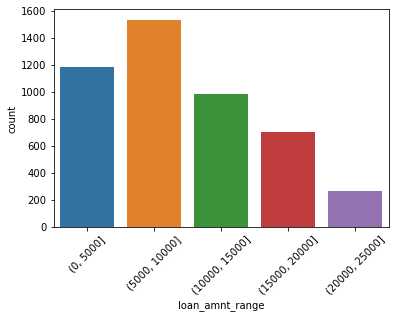

In [37]:
plt.xticks(rotation=45)
sns.countplot(x='loan_amnt_range', data=df1[df1['loan_status']=='Charged Off'])

##### Observation: Loan amount ranging in the bin 5k-10k has more defaulters

<AxesSubplot:xlabel='int_rate_range', ylabel='count'>

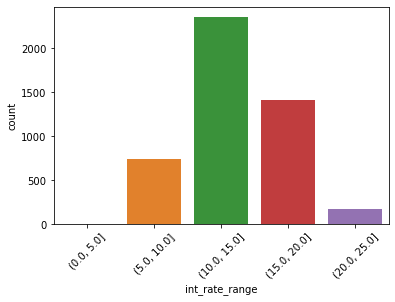

In [38]:
plt.xticks(rotation=45)
sns.countplot(x='int_rate_range', data=df1[df1['loan_status']=='Charged Off'])

##### Observation: Interest rate ranging in 10-15% has more defaulters

<AxesSubplot:xlabel='income_range', ylabel='count'>

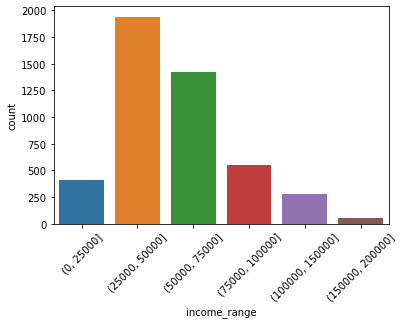

In [39]:
plt.xticks(rotation=45)
sns.countplot(x='income_range', data=df1[df1['loan_status']=='Charged Off'])

##### Observation: Defaulters are more with the income range between 25k-50k

<AxesSubplot:xlabel='dti_range', ylabel='count'>

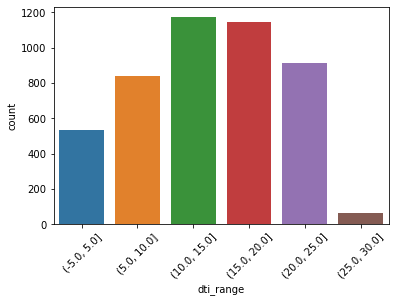

In [40]:
plt.xticks(rotation=45)
sns.countplot(x='dti_range', data=df1[df1['loan_status']=='Charged Off'])

##### Observation: Defaulters are more and almost the same for dti ranges 10-15 and 15-20

## BiVariate analysis

### Loan amount vs Term

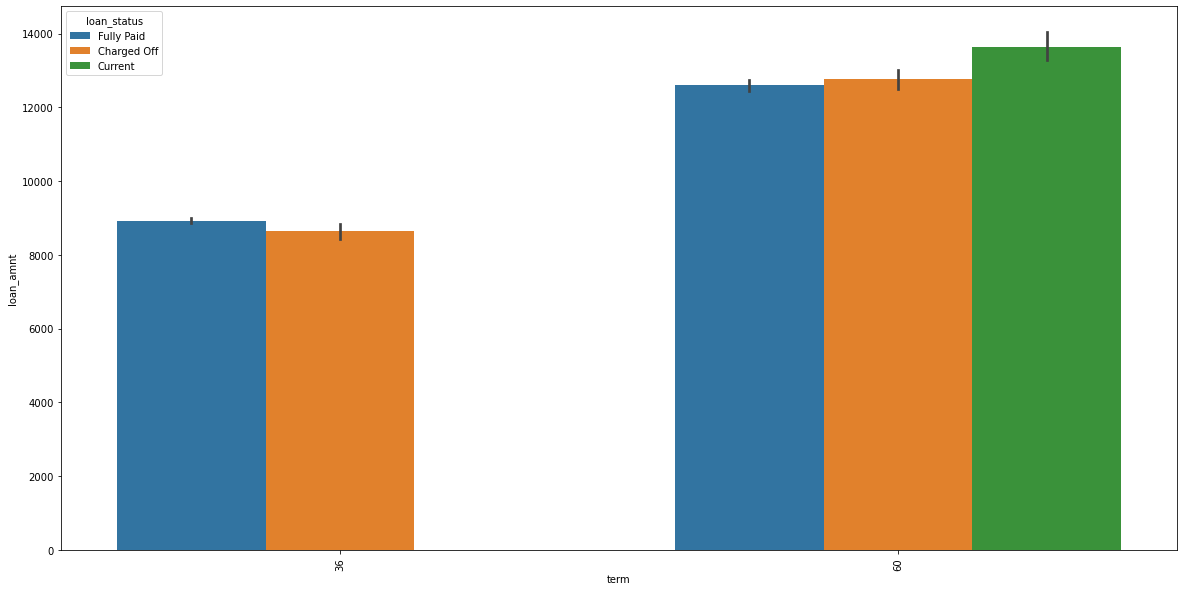

In [74]:
plt.figure(figsize=(20,10))
sns.barplot(x='term',y='loan_amnt', data=df1,hue='loan_status')
plt.xticks(rotation=90)
plt.show()

#### Observation: Loan amount for 60 months is higher than that of 36months

### Loan amount vs Income range

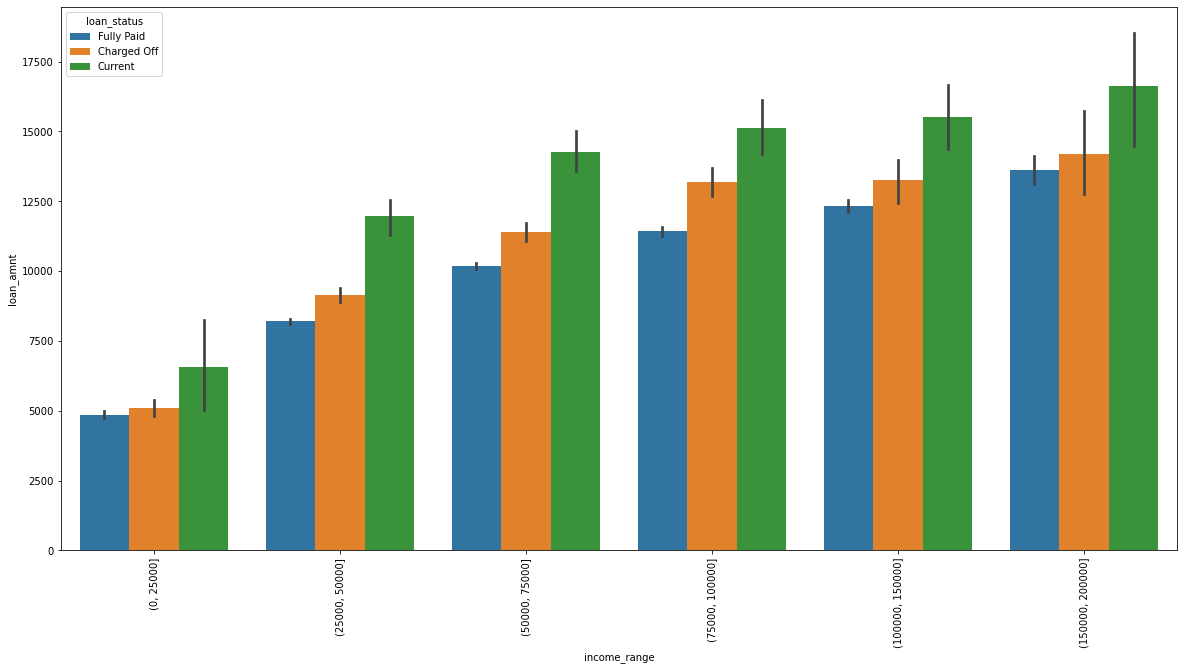

In [54]:
plt.figure(figsize=(20,10))
sns.barplot(x='income_range',y='loan_amnt', data=df1,hue='loan_status')
plt.xticks(rotation=90)
plt.show()

#### Observation: Of all income groups, higher the loan amount higher the chances of defaulters

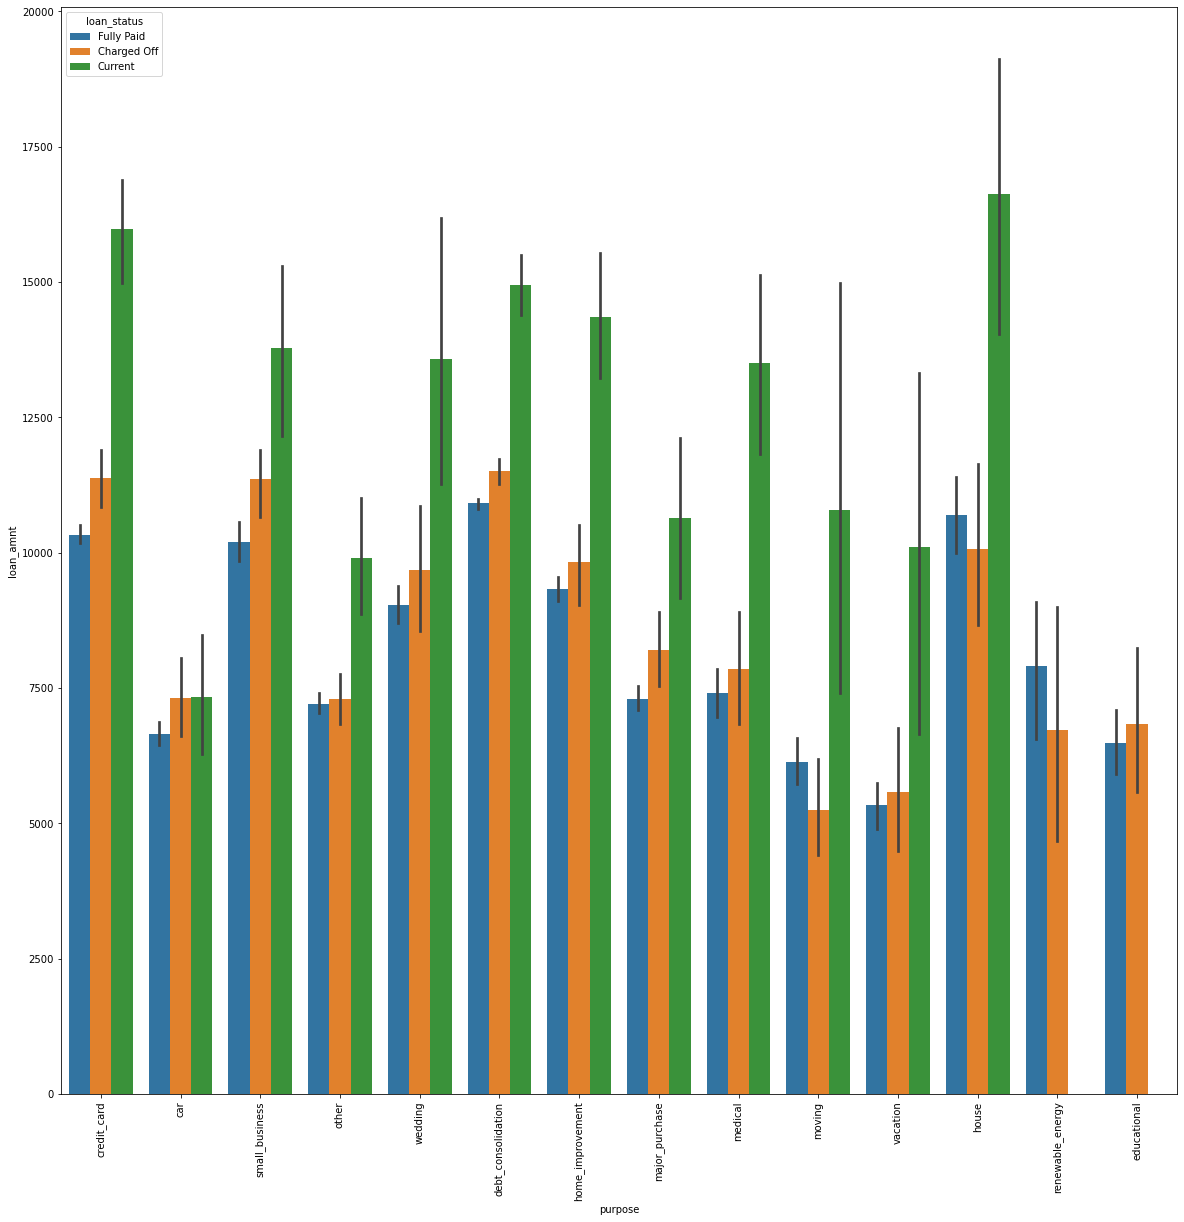

In [61]:
plt.figure(figsize=(20,20))
sns.barplot(x='purpose',y='loan_amnt', data=df1,hue='loan_status')
plt.xticks(rotation=90)
plt.show()

#### Observation: No matter the purpose defaulters are more w.r.t loan amount

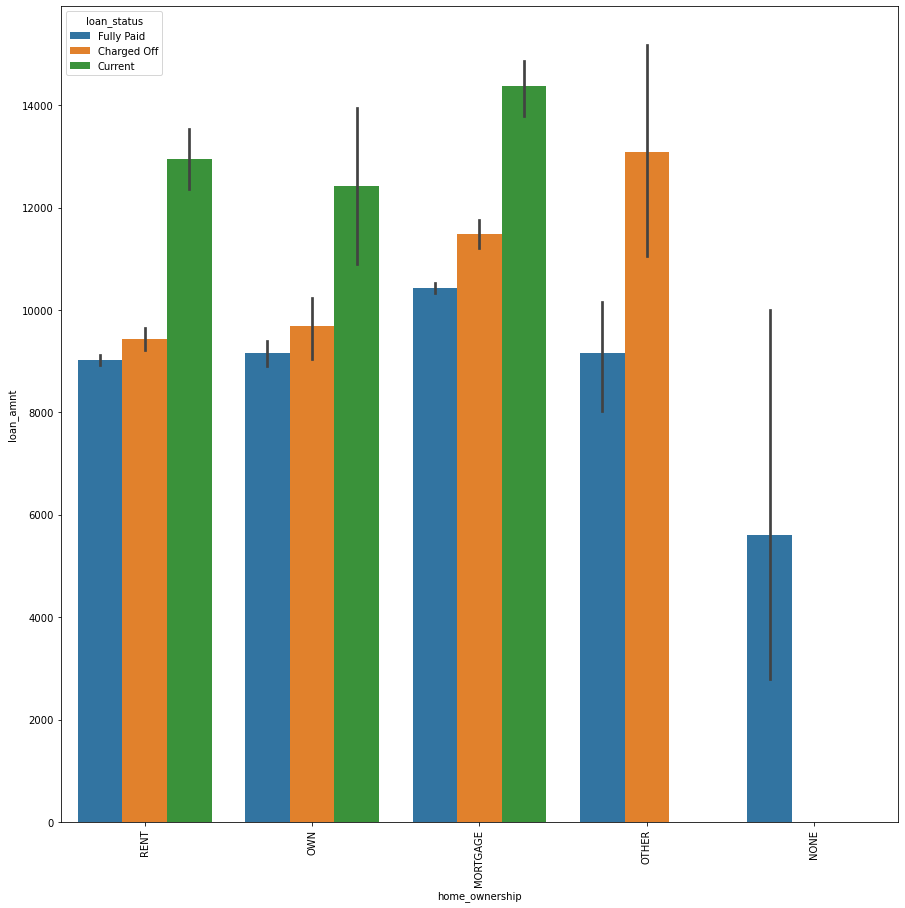

In [60]:
plt.figure(figsize=(15,15))
sns.barplot(x='home_ownership',y='loan_amnt', data=df1,hue='loan_status')
plt.xticks(rotation=90)
plt.show()

#### Observation: Defaulters and loan amount are higher who mentioned the home ownership as other

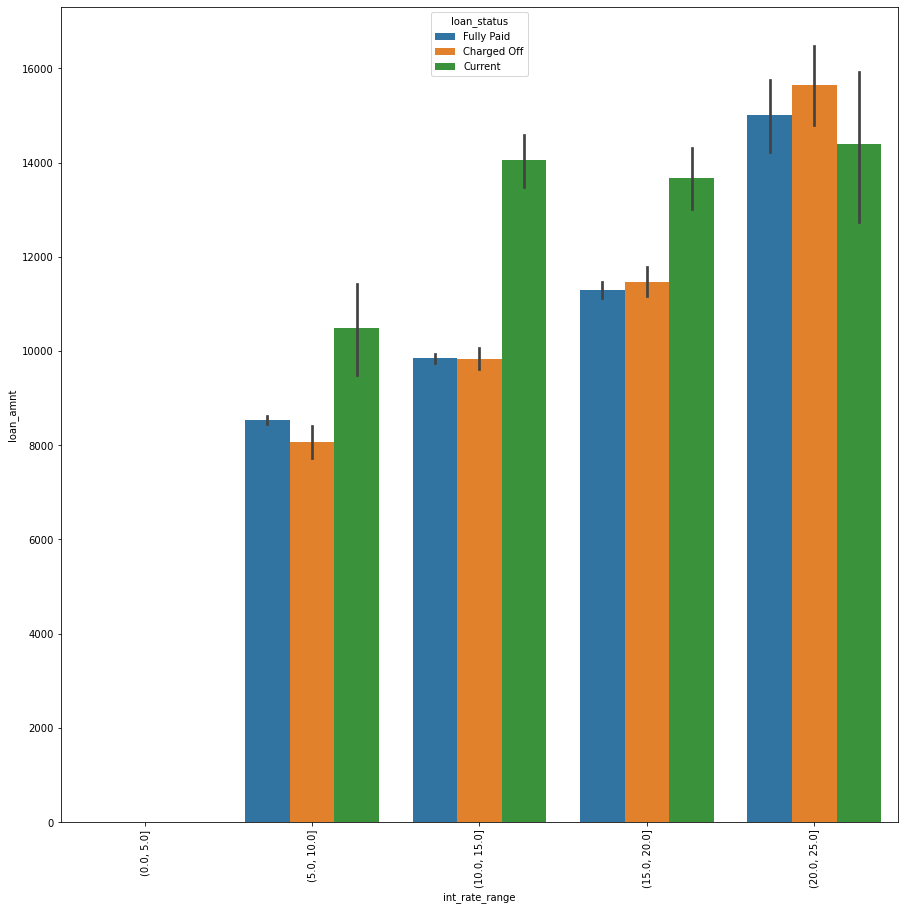

In [62]:
plt.figure(figsize=(15,15))
sns.barplot(x='int_rate_range',y='loan_amnt', data=df1,hue='loan_status')
plt.xticks(rotation=90)
plt.show()

#### Observation: As the interest rate increases, loan amount increases, so does the defaulters.

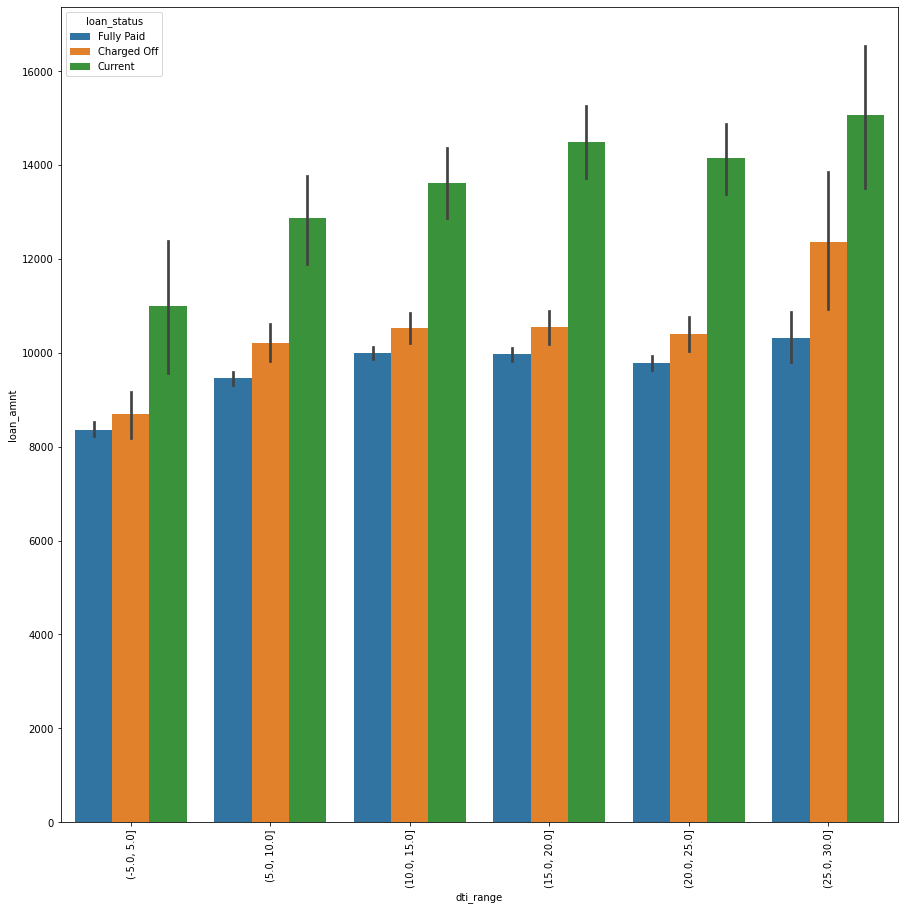

In [63]:
plt.figure(figsize=(15,15))
sns.barplot(x='dti_range',y='loan_amnt', data=df1,hue='loan_status')
plt.xticks(rotation=90)
plt.show()

#### Observation: DTI with respect to loan amount doesn't seem to be having a great impact on the loan status.

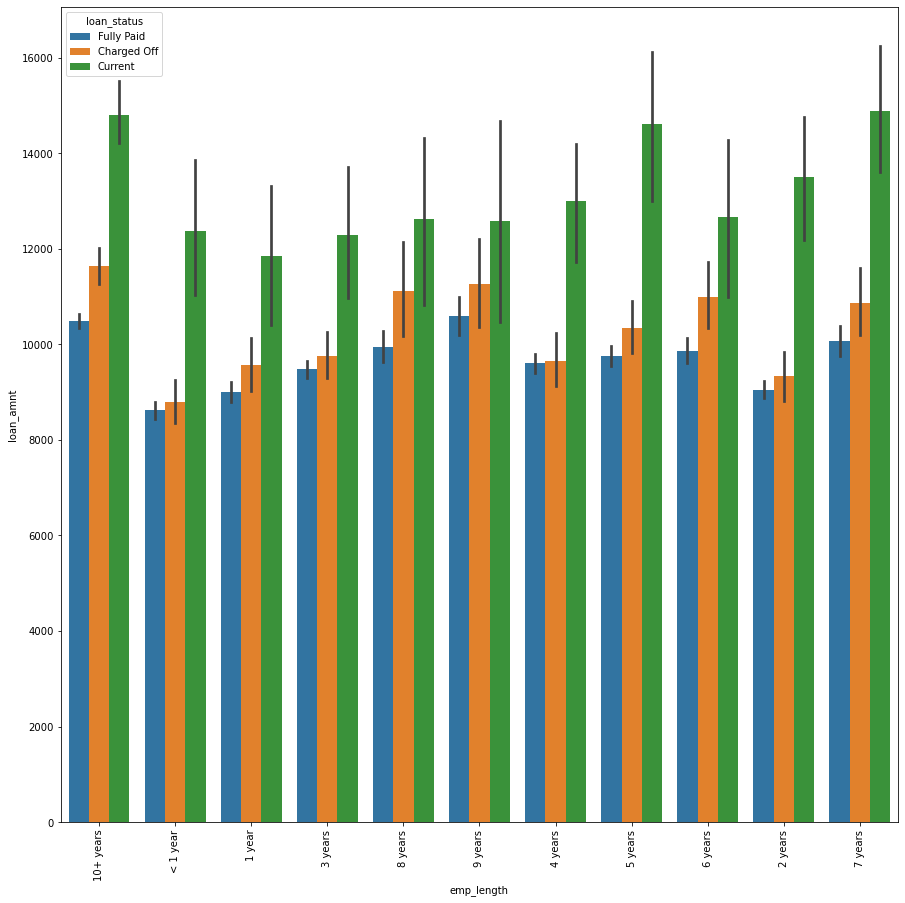

In [64]:
plt.figure(figsize=(15,15))
sns.barplot(x='emp_length',y='loan_amnt', data=df1,hue='loan_status')
plt.xticks(rotation=90)
plt.show()

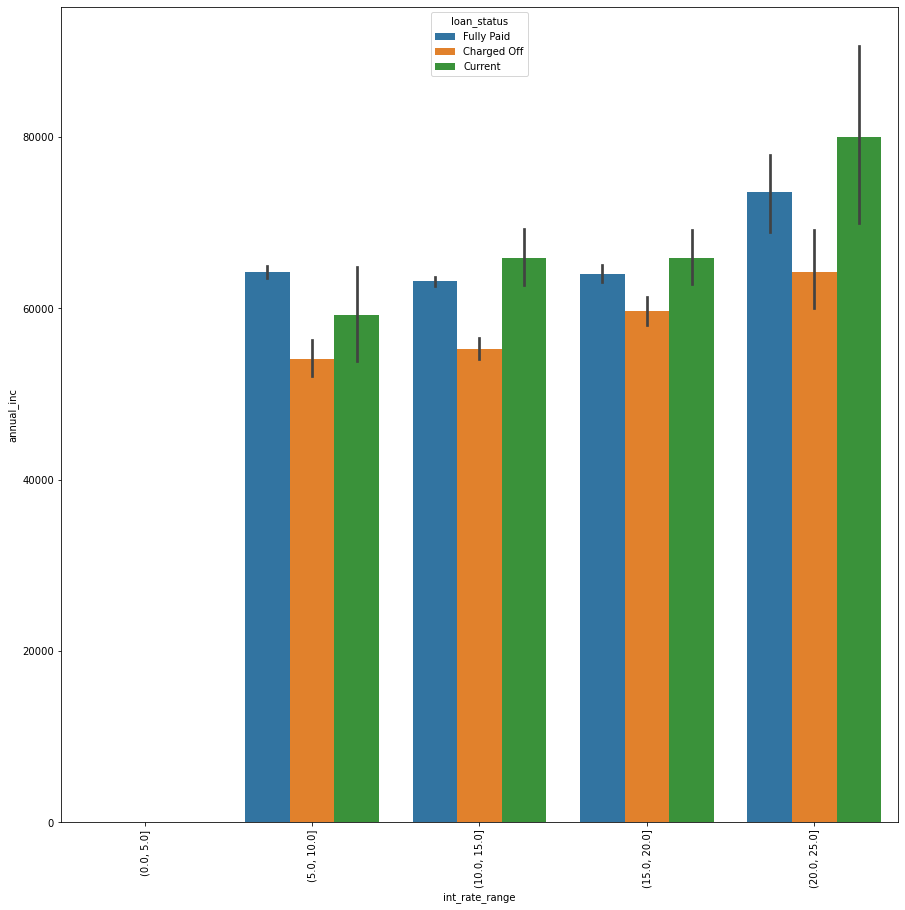

In [75]:
plt.figure(figsize=(15,15))
sns.barplot(x='int_rate_range',y='annual_inc', data=df1,hue='loan_status')
plt.xticks(rotation=90)
plt.show()

#### Observation: defaulters are more if the loan amount and experience is higher

### Conclusion and Recommendations:

### From the above analysis of charged off loans. Defaulters are the ones who are most likely:

1. Applicants whose employment length 10+years and loan amount is 10K-12K.
2. Applicants who has taken the loan 14K-16K with interest rate 20-25%.
3. Applicants who RENT the house and income group is 25K-50K.
4. Applicants who take higher loan termed as 36 months.
5. Applicants who mention the purpose is debt consolidation, credit card with loan amount 10K-12K.
6. Applicants who has income above 75K and loan amount between 11K-12.5K
7. Applicants who has DTI Ranging between 10-20 and interest rate also 10-15%.
8. Applicants whose interest rate is 15-25% and salary range is 50-60K.